In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from plotly.subplots import make_subplots
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
df = pd.DataFrame(data)
df

Age  Gender    Height      Weight        CALC FAVC  FCVC  NCP  \
0     21.000000  Female  1.620000   64.000000          no   no   2.0  3.0   
1     21.000000  Female  1.520000   56.000000   Sometimes   no   3.0  3.0   
2     23.000000    Male  1.800000   77.000000  Frequently   no   2.0  3.0   
3     27.000000    Male  1.800000   87.000000  Frequently   no   3.0  3.0   
4     22.000000    Male  1.780000   89.800000   Sometimes   no   2.0  1.0   
...         ...     ...       ...         ...         ...  ...   ...  ...   
2106  20.976842  Female  1.710730  131.408528   Sometimes  yes   3.0  3.0   
2107  21.982942  Female  1.748584  133.742943   Sometimes  yes   3.0  3.0   
2108  22.524036  Female  1.752206  133.689352   Sometimes  yes   3.0  3.0   
2109  24.361936  Female  1.739450  133.346641   Sometimes  yes   3.0  3.0   
2110  23.664709  Female  1.738836  133.472641   Sometimes  yes   3.0  3.0   

      SCC SMOKE      CH2O family_history_with_overweight       FAF       TUE  \
0      no    no  2.000000                            yes  0.000000  1.000000   
1     yes   yes  3.000000                            yes  3.000000  0.000000   
2      no    no  2.000000                            yes  2.000000  1.000000   
3      no    no  2.000000                             no  2.000000  0.000000   
4      no    no  2.000000                             no  0.000000  0.000000   
...   ...   ...       ...                            ...       ...       ...   
2106   no    no  1.728139                            yes  1.676269  0.906247   
2107   no    no  2.005130                            yes  1.341390  0.599270   
2108   no    no  2.054193                            yes  1.414209  0.646288   
2109   no    no  2.852339                            yes  1.139107  0.586035   
2110   no    no  2.863513                            yes  1.026452  0.714137   

           CAEC                 MTRANS           NObeyesdad  
0     Sometimes  Public_Transportation        Normal_Weight  
1     Sometimes  Public_Transportation        Normal_Weight  
2     Sometimes  Public_Transportation        Normal_Weight  
3     Sometimes                Walking   Overweight_Level_I  
4     Sometimes  Public_Transportation  Overweight_Level_II  
...         ...                    ...                  ...  
2106  Sometimes  Public_Transportation     Obesity_Type_III  
2107  Sometimes  Public_Transportation     Obesity_Type_III  
2108  Sometimes  Public_Transportation     Obesity_Type_III  
2109  Sometimes  Public_Transportation     Obesity_Type_III  
2110  Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

In [297]:
df.shape

(2111, 17)

So in this project we have 2111 samples with 16 features and one target (NObeyesdad)

In [298]:
categorical_features = ['Gender','CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']
continuous_features = ['Age', 'Height', 'Weight','FCVC', "NCP", 'CH2O' ,'FAF', 'TUE']

pie chart of target

In [299]:
target_count = df['NObeyesdad'].value_counts()
target_unique = df['NObeyesdad'].unique()

In [300]:
target_unique

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [301]:
fig = px.pie(values= target_count, names = target_unique,color_discrete_sequence=px.colors.qualitative.Pastel1 ,title = "the number of people related to each type of obesity level")

fig.show()

# creating new dataframes targeting the targets in obesity level with the same type

In [302]:
## obesity type I,II,III

In [303]:
df_ot = df[df["NObeyesdad"] == 'Obesity_Type_I' ]
df_ot2 = df[df["NObeyesdad"] == 'Obesity_Type_II']
df_ot3 = df[df["NObeyesdad"] == 'Obesity_Type_III']


In [304]:
df_ot_final = pd.concat([df_ot,df_ot2,df_ot3])      # data frem of Obesity_Type I, II, III
df_ot_final.reset_index(drop=True, inplace = True)

In [305]:
## over weight type I,II

In [306]:
df_ow = df[df["NObeyesdad"]=='Overweight_Level_I']
df_ow2 = df[df["NObeyesdad"]=='Overweight_Level_II']

In [307]:
df_ow_final = pd.concat([df_ow,df_ow2])    # data frem of Over_weight_Type I, II
df_ow_final.reset_index(drop=True, inplace = True)

In [308]:
## normal weight

In [309]:
df_n = df[df["NObeyesdad"]=='Normal_Weight']

In [310]:
## Insufficient_Weight

In [311]:
df_In = df[df["NObeyesdad"]=='Insufficient_Weight']

In [312]:
## so we have 4 diffrenet dataframes

# categorical features

In [313]:
categorical_features = ['Gender','CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']

# Gender

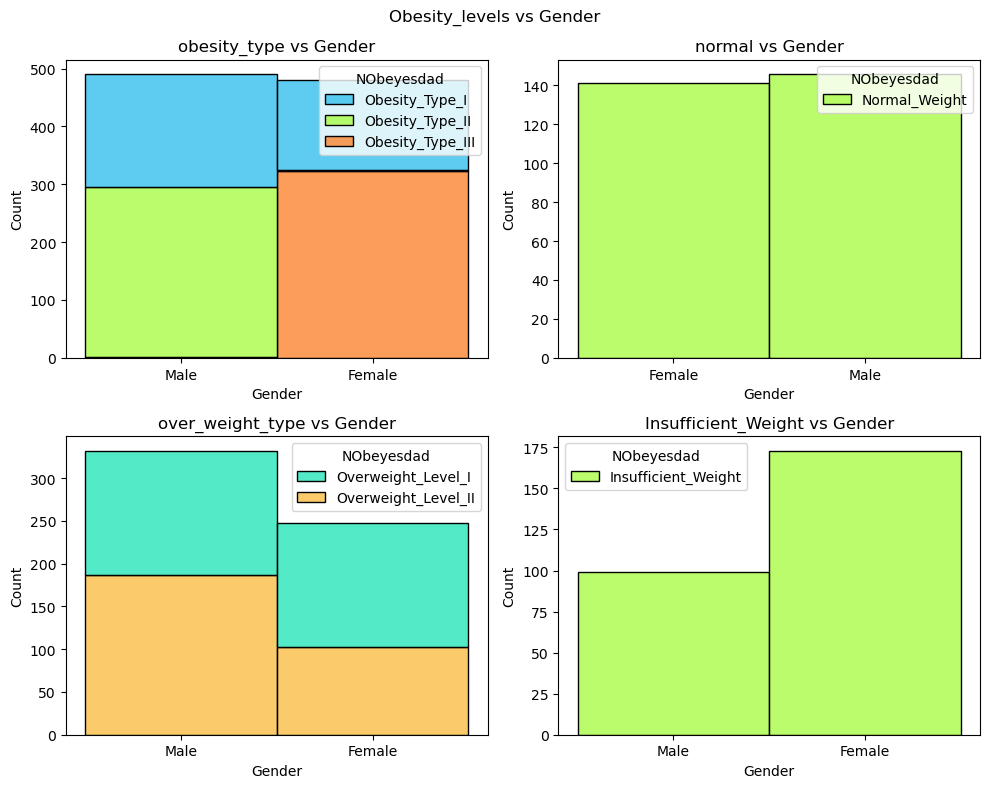

In [314]:
data_list = [df_ot_final, df_ow_final, df_n, df_In]

data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig, axes = plt.subplots(figsize=(10,8),nrows = 2 , ncols =2)

for i in range(2):
    
    sns.histplot(data=data_list[i], x='Gender', hue='NObeyesdad',palette= 'turbo', ax=axes[i, 0], multiple='stack')
    axes[i,0].set_title(f'{data_name[i]} vs Gender')
    
    sns.histplot(data=data_list[i+2], x='Gender', hue='NObeyesdad',palette= 'turbo', ax=axes[i, 1], multiple='stack')
    axes[i,1].set_title(f'{data_name[i+2]} vs Gender')
    
fig.suptitle('Obesity_levels vs Gender')
plt.tight_layout()
plt.show()
    


# CALC

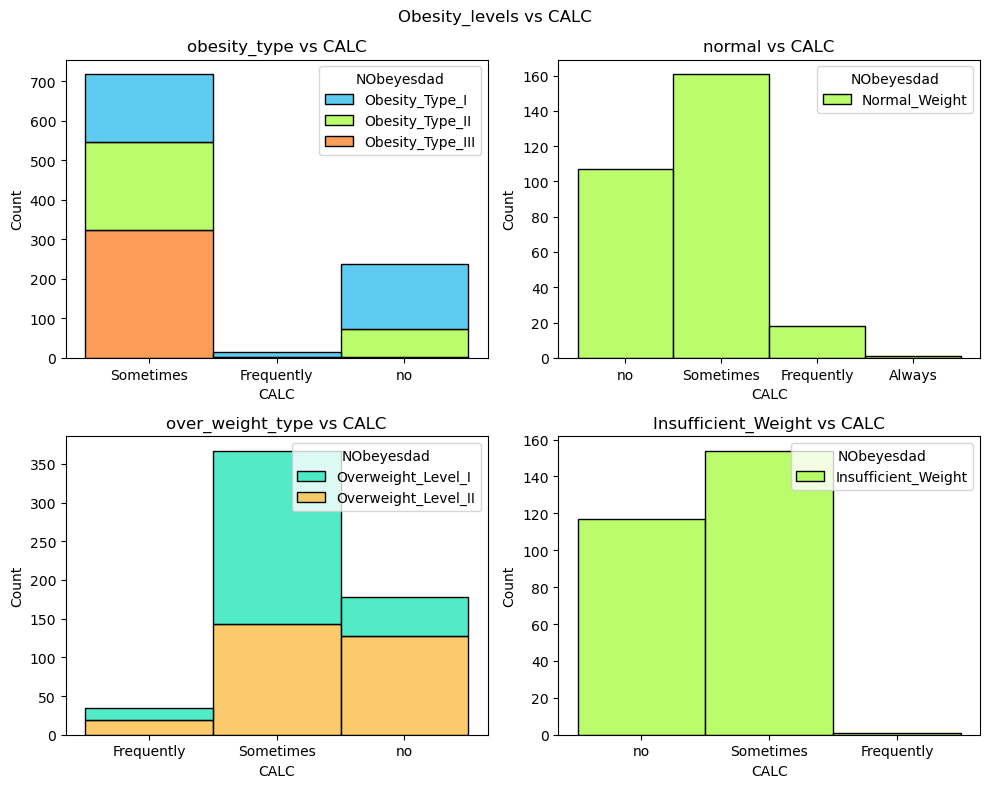

In [315]:
data_list = [df_ot_final, df_ow_final, df_n, df_In]

data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig, axes = plt.subplots(figsize=(10,8),nrows = 2 , ncols =2)

for i in range(2):
    
    sns.histplot(data=data_list[i], x='CALC', hue='NObeyesdad',palette= 'turbo', ax=axes[i, 0], multiple='stack')
    axes[i,0].set_title(f'{data_name[i]} vs CALC')
    
    sns.histplot(data=data_list[i+2], x='CALC', hue='NObeyesdad',palette= 'turbo', ax=axes[i, 1], multiple='stack')
    axes[i,1].set_title(f'{data_name[i+2]} vs CALC')
    
fig.suptitle('Obesity_levels vs CALC')
plt.tight_layout()
plt.show()

# FAVC

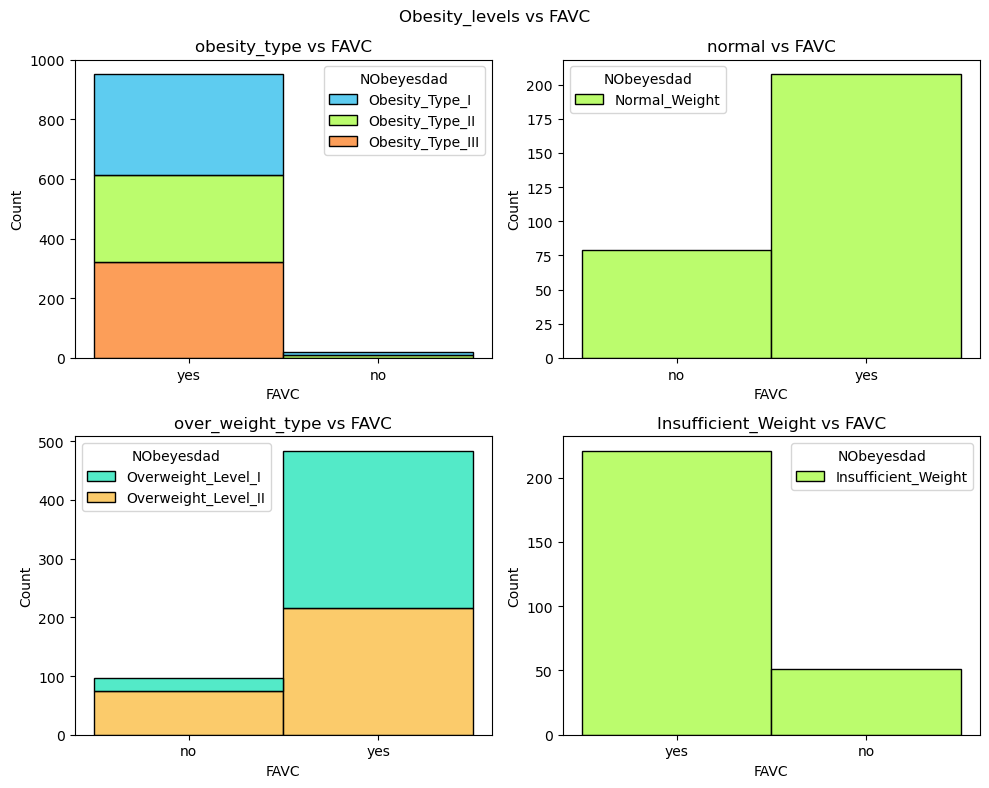

In [316]:
data_list = [df_ot_final, df_ow_final, df_n, df_In]

data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig, axes = plt.subplots(figsize=(10,8),nrows = 2 , ncols =2)

for i in range(2):
    
    sns.histplot(data=data_list[i], x='FAVC', hue='NObeyesdad',palette= 'turbo' ,ax=axes[i, 0], multiple='stack')
    axes[i,0].set_title(f'{data_name[i]} vs FAVC')
    
    sns.histplot(data=data_list[i+2], x='FAVC', hue='NObeyesdad', palette= 'turbo',ax=axes[i, 1], multiple='stack')
    axes[i,1].set_title(f'{data_name[i+2]} vs FAVC')
    
fig.suptitle('Obesity_levels vs FAVC')
plt.tight_layout()
plt.show()


# SCC

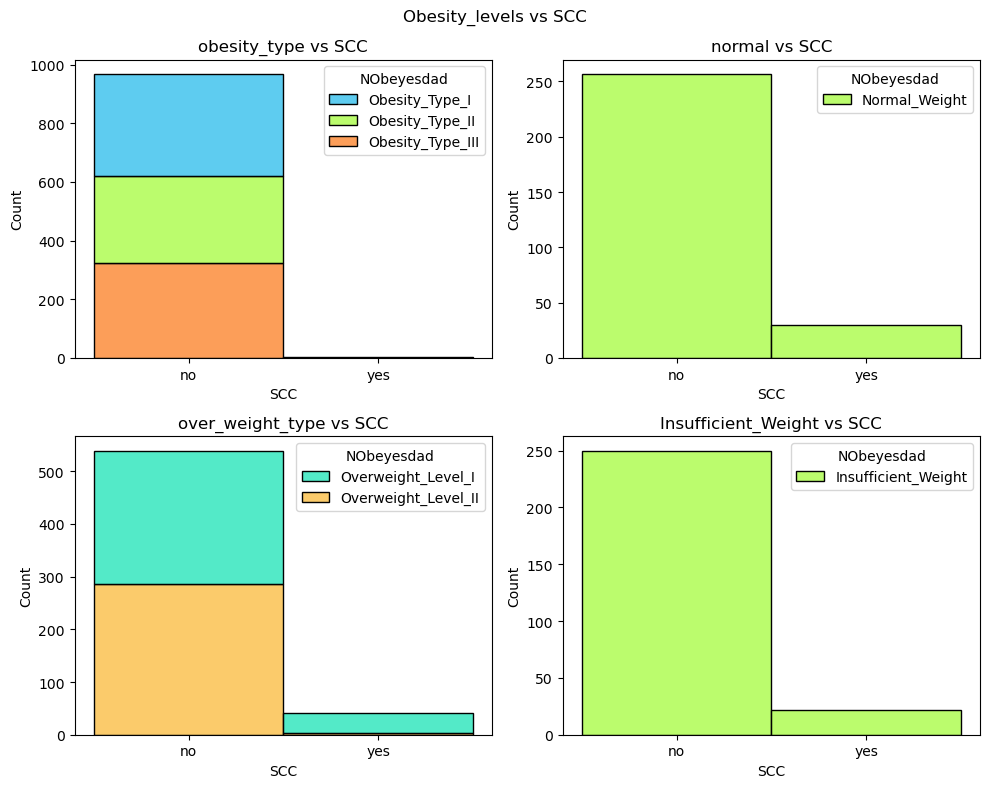

In [317]:
data_list = [df_ot_final, df_ow_final, df_n, df_In]

data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig, axes = plt.subplots(figsize=(10,8),nrows = 2 , ncols =2)

for i in range(2):
    
    sns.histplot(data=data_list[i], x='SCC', hue='NObeyesdad',palette= 'turbo', ax=axes[i, 0], multiple='stack')
    axes[i,0].set_title(f'{data_name[i]} vs SCC')
    
    sns.histplot(data=data_list[i+2], x='SCC', hue='NObeyesdad',palette = "turbo" ,ax=axes[i, 1], multiple='stack')
    axes[i,1].set_title(f'{data_name[i+2]} vs SCC')
    
fig.suptitle('Obesity_levels vs SCC')
plt.tight_layout()
plt.show()

# SMOKE

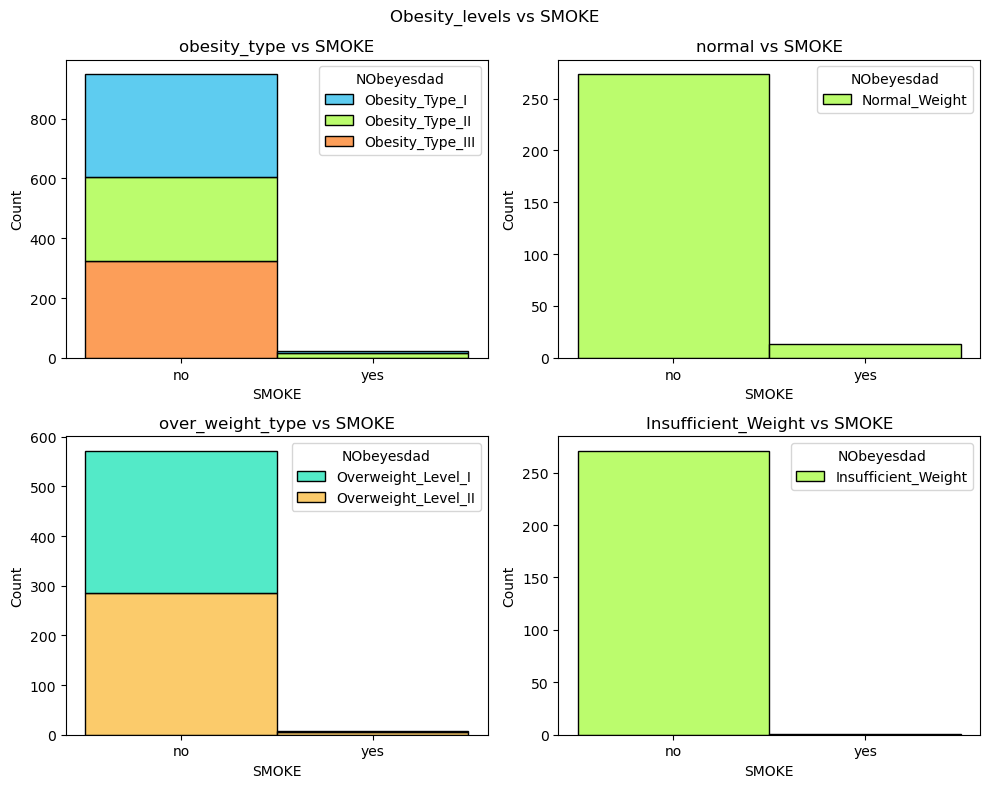

In [318]:
data_list = [df_ot_final, df_ow_final, df_n, df_In]

data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig, axes = plt.subplots(figsize=(10,8),nrows = 2 , ncols =2)

for i in range(2):
    
    sns.histplot(data=data_list[i], x='SMOKE', hue='NObeyesdad', palette= 'turbo',ax=axes[i, 0], multiple='stack')
    axes[i,0].set_title(f'{data_name[i]} vs SMOKE')
    
    sns.histplot(data=data_list[i+2], x='SMOKE', hue='NObeyesdad', palette= 'turbo',ax=axes[i, 1], multiple='stack')
    axes[i,1].set_title(f'{data_name[i+2]} vs SMOKE')
    
fig.suptitle('Obesity_levels vs SMOKE')
plt.tight_layout()
plt.show()

# family_history_with_overweight

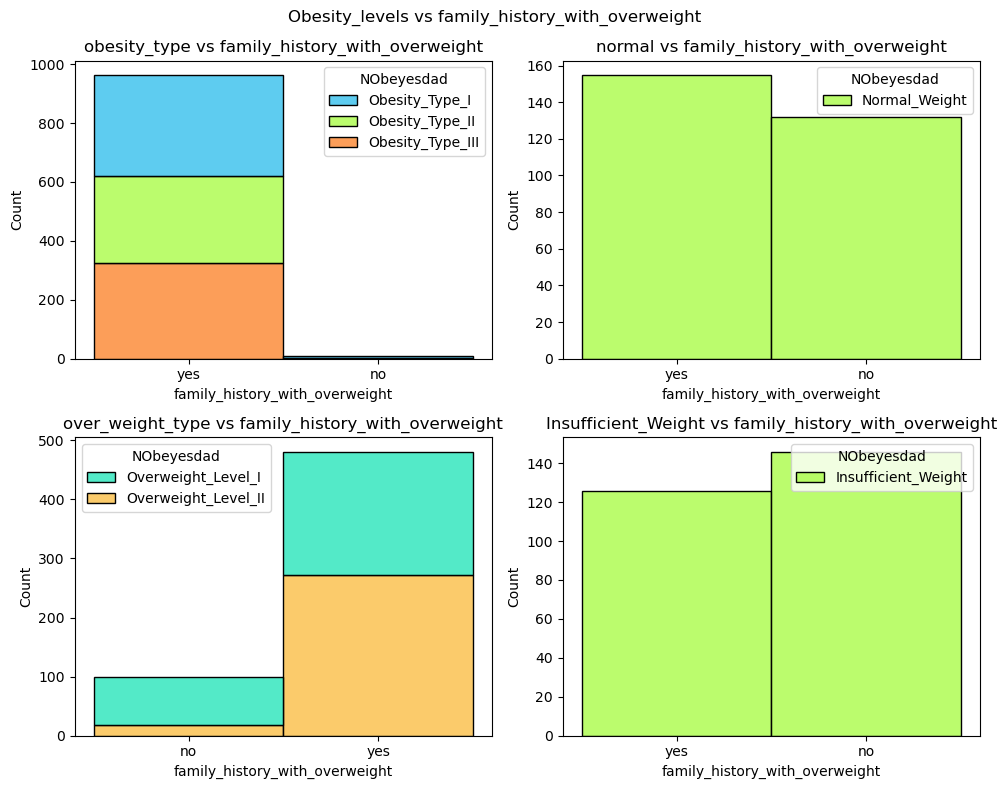

In [319]:
data_list = [df_ot_final, df_ow_final, df_n, df_In]

data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig, axes = plt.subplots(figsize=(10,8),nrows = 2 , ncols =2)

for i in range(2):
    
    sns.histplot(data=data_list[i], x='family_history_with_overweight', hue='NObeyesdad',palette= 'turbo', ax=axes[i, 0], multiple='stack')
    axes[i,0].set_title(f'{data_name[i]} vs family_history_with_overweight')
    
    sns.histplot(data=data_list[i+2], x='family_history_with_overweight', hue='NObeyesdad',palette= 'turbo', ax=axes[i, 1], multiple='stack')
    axes[i,1].set_title(f'{data_name[i+2]} vs family_history_with_overweight')
    
fig.suptitle('Obesity_levels vs family_history_with_overweight')
plt.tight_layout()
plt.show()

# CAEC

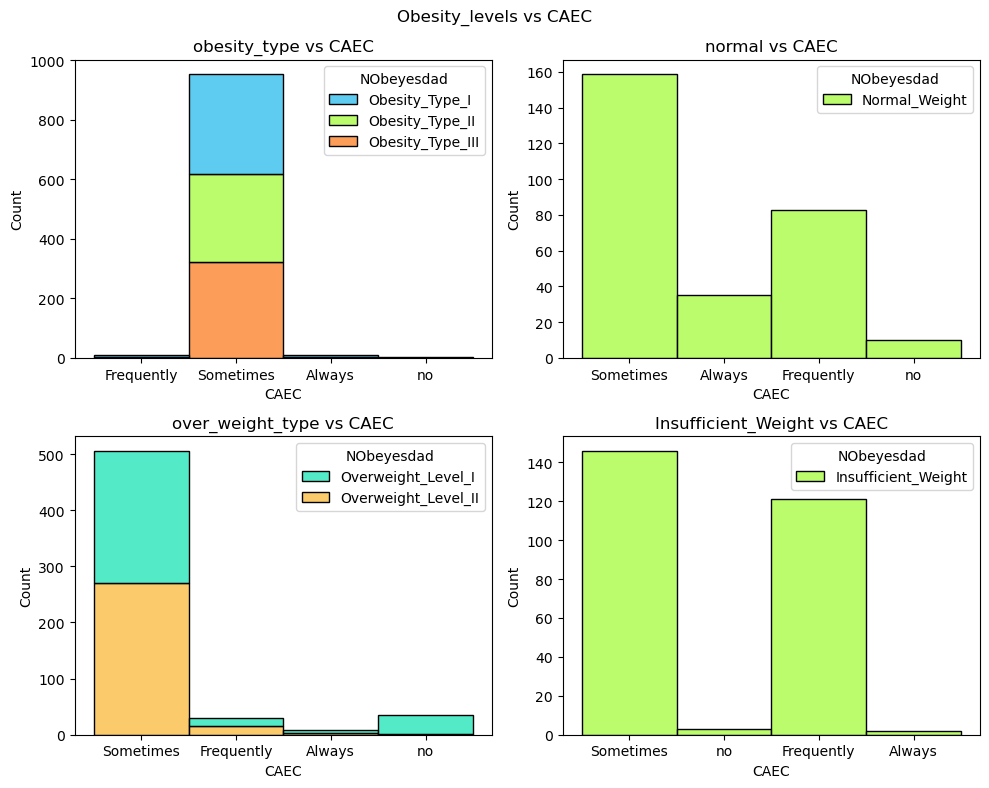

In [320]:
data_list = [df_ot_final, df_ow_final, df_n, df_In]

data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig, axes = plt.subplots(figsize=(10,8),nrows = 2 , ncols =2)

for i in range(2):
    
    sns.histplot(data=data_list[i], x='CAEC', hue='NObeyesdad', palette= 'turbo',ax=axes[i, 0], multiple='stack')
    axes[i,0].set_title(f'{data_name[i]} vs CAEC')
    
    sns.histplot(data=data_list[i+2], x='CAEC', hue='NObeyesdad', palette= 'turbo',ax=axes[i, 1], multiple='stack')
    axes[i,1].set_title(f'{data_name[i+2]} vs CAEC')
    
fig.suptitle('Obesity_levels vs CAEC')
plt.tight_layout()
plt.show()

# MTRANS

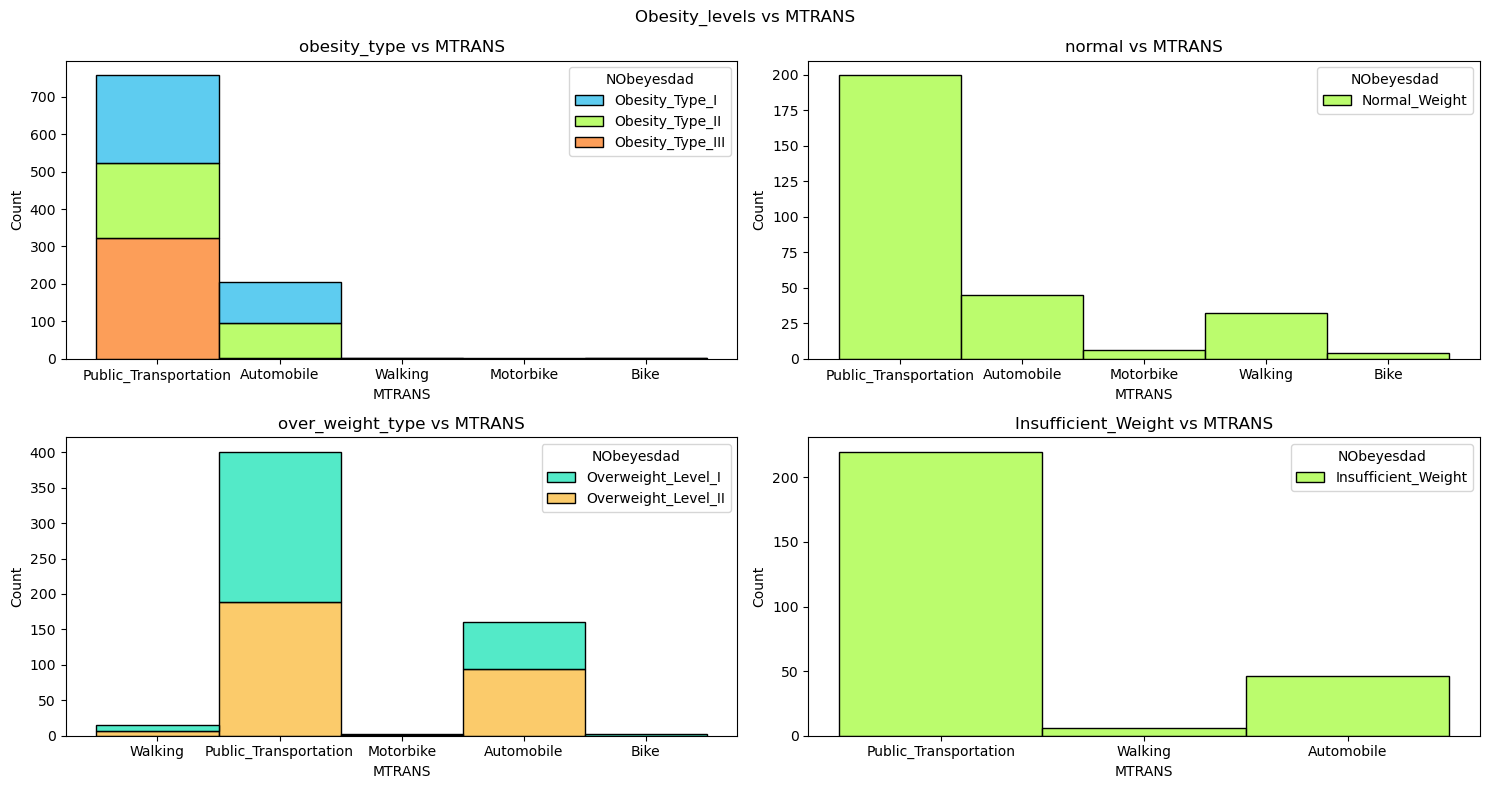

In [321]:
data_list = [df_ot_final, df_ow_final, df_n, df_In]

data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig, axes = plt.subplots(figsize=(15,8),nrows = 2 , ncols =2)

for i in range(2):
    
    sns.histplot(data=data_list[i], x='MTRANS', hue='NObeyesdad', palette= 'turbo',ax=axes[i, 0], multiple='stack')
    axes[i,0].set_title(f'{data_name[i]} vs MTRANS')
    
    sns.histplot(data=data_list[i+2], x='MTRANS', hue='NObeyesdad',palette= 'turbo', ax=axes[i, 1], multiple='stack')
    axes[i,1].set_title(f'{data_name[i+2]} vs MTRANS')
    
fig.suptitle('Obesity_levels vs MTRANS')
plt.tight_layout()
plt.show()

# sunburst chart (categorical features)

# Gender

In [322]:
fig = make_subplots(rows=2, cols=2, specs=[ [{"type": "sunburst"}, {"type": "sunburst"}],[{"type": "sunburst"}, {"type": "sunburst"}]],
                                          subplot_titles=["Obesity_Types vs family_history", "Over_weight vs family_history", "Normal_weight vs family_history","Insufficient_Weight vs family_history"],
                                       vertical_spacing = 0.1   )


figaux = px.sunburst(df_ot_final, path=[ 'NObeyesdad','Gender'], color = 'Gender', 
                      color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=1, col=1)

############################################
                           
figaux = px.sunburst(df_ow_final ,path=[ 'NObeyesdad','Gender'], color = 'Gender',
                  color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=1, col=2)

#############################################

figaux = px.sunburst(df_In, path=[ 'NObeyesdad','Gender'], color = 'Gender', 
                      color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=2, col=1)

#############################################

figaux = px.sunburst(df_n, path=[ 'NObeyesdad','Gender'], color = 'Gender', 
                      color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=2, col=2)


fig.update_layout(width=700, height=800,title_text=("Obesity levels vs Gender"))
fig.show()

# CALC

In [323]:
fig = make_subplots(rows=2, cols=2, specs=[ [{"type": "sunburst"}, {"type": "sunburst"}],[{"type": "sunburst"}, {"type": "sunburst"}]],
                                          subplot_titles=["Obesity_Types vs family_history", "Over_weight vs family_history", "Normal_weight vs family_history","Insufficient_Weight vs family_history"],
                                       vertical_spacing = 0.1   )


figaux = px.sunburst(df_ot_final, path=[ 'NObeyesdad','CALC'], color = 'CALC', 
                      color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=1, col=1)

############################################
                           
figaux = px.sunburst(df_ow_final ,path=[ 'NObeyesdad','CALC'], color = 'CALC',
                  color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=1, col=2)

#############################################

figaux = px.sunburst(df_In, path=[ 'NObeyesdad','CALC'], color = 'CALC', 
                      color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=2, col=1)

#############################################

figaux = px.sunburst(df_n, path=[ 'NObeyesdad','CALC'], color = 'CALC', 
                      color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=2, col=2)


fig.update_layout(width=700, height=800,title_text=("Obesity levels vs CALC"))
fig.show()

# FAVC

In [324]:
fig = make_subplots(rows=2, cols=2, specs=[ [{"type": "sunburst"}, {"type": "sunburst"}],[{"type": "sunburst"}, {"type": "sunburst"}]],
                                          subplot_titles=["Obesity_Types vs family_history", "Over_weight vs family_history", "Normal_weight vs family_history","Insufficient_Weight vs family_history"],
                                       vertical_spacing = 0.1   )


figaux = px.sunburst(df_ot_final, path=[ 'NObeyesdad','FAVC'], color = 'FAVC', 
                      color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=1, col=1)

############################################
                           
figaux = px.sunburst(df_ow_final ,path=[ 'NObeyesdad','FAVC'], color = 'FAVC',
                  color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=1, col=2)

#############################################

figaux = px.sunburst(df_In, path=[ 'NObeyesdad','FAVC'], color = 'FAVC', 
                      color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=2, col=1)

#############################################

figaux = px.sunburst(df_n, path=[ 'NObeyesdad','FAVC'], color = 'FAVC', 
                      color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=2, col=2)


fig.update_layout(width=700, height=800,title_text=("Obesity levels vs FAVC"))
fig.show()

# SCC

In [325]:
fig = make_subplots(rows=2, cols=2, specs=[ [{"type": "sunburst"}, {"type": "sunburst"}],[{"type": "sunburst"}, {"type": "sunburst"}]],
                                          subplot_titles=["Obesity_Types vs family_history", "Over_weight vs family_history", "Normal_weight vs family_history","Insufficient_Weight vs family_history"],
                                       vertical_spacing = 0.1   )


figaux = px.sunburst(df_ot_final, path=[ 'NObeyesdad','SCC'], color = 'SCC', 
                      color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=1, col=1)

############################################
                           
figaux = px.sunburst(df_ow_final ,path=[ 'NObeyesdad','SCC'], color = 'SCC',
                  color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=1, col=2)

#############################################

figaux = px.sunburst(df_In, path=[ 'NObeyesdad','SCC'], color = 'SCC', 
                      color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=2, col=1)

#############################################

figaux = px.sunburst(df_n, path=[ 'NObeyesdad','SCC'], color = 'SCC', 
                      color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=2, col=2)


fig.update_layout(width=700, height=800,title_text=("Obesity levels vs SCC"))
fig.show()

# SMOKE

In [326]:
fig = make_subplots(rows=2, cols=2, specs=[ [{"type": "sunburst"}, {"type": "sunburst"}],[{"type": "sunburst"}, {"type": "sunburst"}]],
                                          subplot_titles=["Obesity_Types vs family_history", "Over_weight vs family_history", "Normal_weight vs family_history","Insufficient_Weight vs family_history"],
                                       vertical_spacing = 0.1   )


figaux = px.sunburst(df_ot_final, path=[ 'NObeyesdad','SMOKE'], color = 'SMOKE', 
                      color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=1, col=1)

############################################
                           
figaux = px.sunburst(df_ow_final ,path=[ 'NObeyesdad','SMOKE'], color = 'SMOKE',
                  color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=1, col=2)

#############################################

figaux = px.sunburst(df_In, path=[ 'NObeyesdad','SMOKE'], color = 'SMOKE', 
                      color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=2, col=1)

#############################################

figaux = px.sunburst(df_n, path=[ 'NObeyesdad','SMOKE'], color = 'SMOKE', 
                      color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=2, col=2)


fig.update_layout(width=700, height=800,title_text=("Obesity levels vs SMOKE"))
fig.show()

# CAEC

In [327]:
fig = make_subplots(rows=2, cols=2, specs=[ [{"type": "sunburst"}, {"type": "sunburst"}],[{"type": "sunburst"}, {"type": "sunburst"}]],
                                          subplot_titles=["Obesity_Types vs family_history", "Over_weight vs family_history", "Normal_weight vs family_history","Insufficient_Weight vs family_history"],
                                       vertical_spacing = 0.1   )


figaux = px.sunburst(df_ot_final, path=[ 'NObeyesdad','CAEC'], color = 'CAEC', 
                      color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=1, col=1)

############################################
                           
figaux = px.sunburst(df_ow_final ,path=[ 'NObeyesdad','CAEC'], color = 'CAEC',
                  color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=1, col=2)

#############################################

figaux = px.sunburst(df_In, path=[ 'NObeyesdad','CAEC'], color = 'CAEC', 
                      color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=2, col=1)

#############################################

figaux = px.sunburst(df_n, path=[ 'NObeyesdad','CAEC'], color = 'CAEC', 
                      color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=2, col=2)


fig.update_layout(width=700, height=800,title_text=("Obesity levels vs CAEC"))
fig.show()

# MTRANS

In [328]:
fig = make_subplots(rows=2, cols=2, specs=[ [{"type": "sunburst"}, {"type": "sunburst"}],[{"type": "sunburst"}, {"type": "sunburst"}]],
                                          subplot_titles=["Obesity_Types vs family_history", "Over_weight vs family_history", "Normal_weight vs family_history","Insufficient_Weight vs family_history"],
                                       vertical_spacing = 0.1   )


figaux = px.sunburst(df_ot_final, path=[ 'NObeyesdad','MTRANS'], color = 'MTRANS', 
                      color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=1, col=1)

############################################
                           
figaux = px.sunburst(df_ow_final ,path=[ 'NObeyesdad','MTRANS'], color = 'MTRANS',
                  color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=1, col=2)

#############################################

figaux = px.sunburst(df_In, path=[ 'NObeyesdad','MTRANS'], color = 'MTRANS', 
                      color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=2, col=1)

#############################################

figaux = px.sunburst(df_n, path=[ 'NObeyesdad','MTRANS'], color = 'MTRANS', 
                      color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.add_trace(figaux.data[0], row=2, col=2)


fig.update_layout(width=700, height=800,title_text=("Obesity levels vs MTRANS"))
fig.show()

# Continuous Features

In [329]:
continuous_features = ['Age', 'Height', 'Weight','FCVC', "NCP", 'CH2O' ,'FAF', 'TUE']

# Box Plot of Continuous Features

In [330]:
fig = make_subplots(rows = 8, cols = 1)

for i in range(len(continuous_features)):
    
    fig.add_trace(go.Box(x= df[continuous_features[i]], name = continuous_features[i]), row = i+1, col =1)
    
    
fig.update_layout(height = 3000, width = 1000)
fig.show()

# KDE plot 

# Age

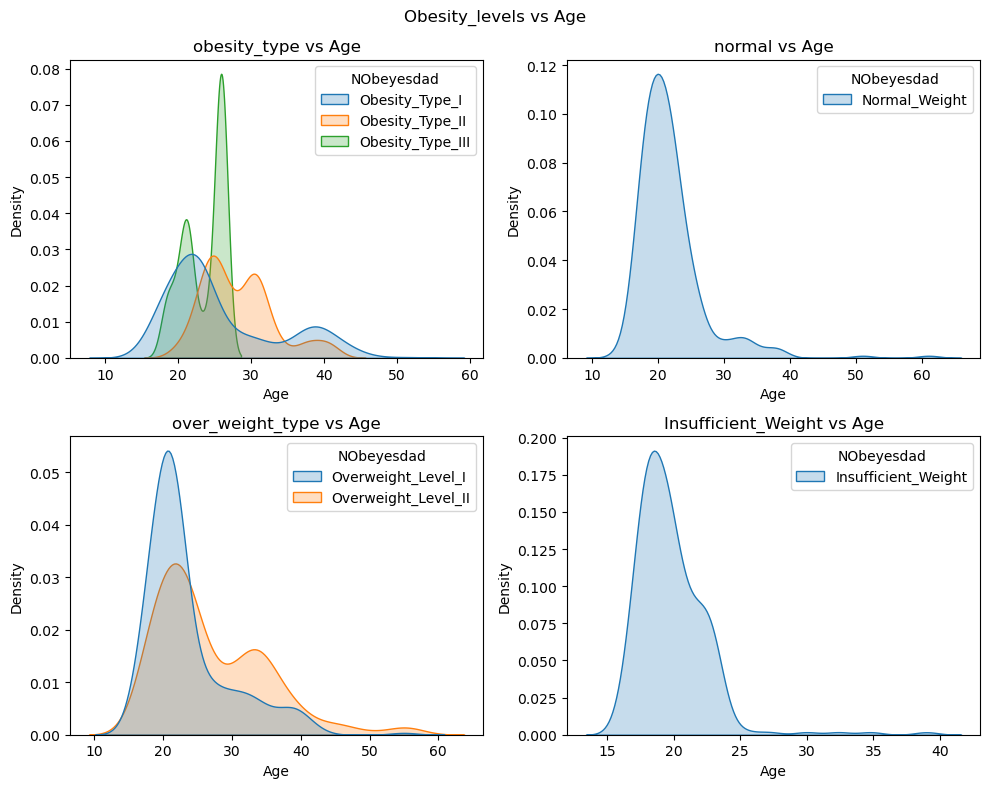

In [331]:
data_list = [df_ot_final, df_ow_final, df_n, df_In]
data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i in range(2):
    
    sns.kdeplot(ax = axes[i,0],data=data_list[i], x="Age", hue="NObeyesdad", fill =True)
    axes[i, 0].set_title(f'{data_name[i]} vs Age')
    
    sns.kdeplot(ax = axes[i,1],data=data_list[i+2], x="Age", hue="NObeyesdad", fill =True)
    axes[i, 1].set_title(f'{data_name[i+2]} vs Age')
    
    
    
fig.suptitle('Obesity_levels vs Age')
plt.tight_layout()
plt.show()
    
    

# Height

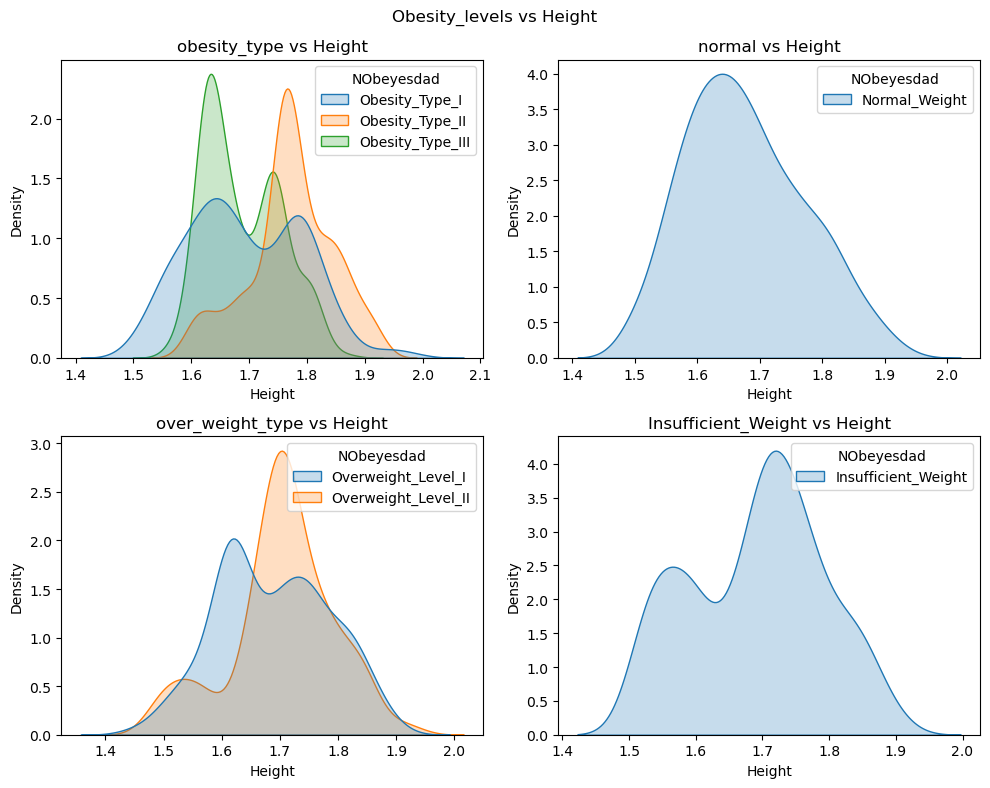

In [332]:
data_list = [df_ot_final, df_ow_final, df_n, df_In]
data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i in range(2):
    
    sns.kdeplot(ax = axes[i,0],data=data_list[i], x="Height", hue="NObeyesdad", fill =True)
    axes[i, 0].set_title(f'{data_name[i]} vs Height')
    
    sns.kdeplot(ax = axes[i,1],data=data_list[i+2], x="Height", hue="NObeyesdad", fill =True)
    axes[i, 1].set_title(f'{data_name[i+2]} vs Height')
    
    
    
fig.suptitle('Obesity_levels vs Height')
plt.tight_layout()
plt.show()
    

# Weight

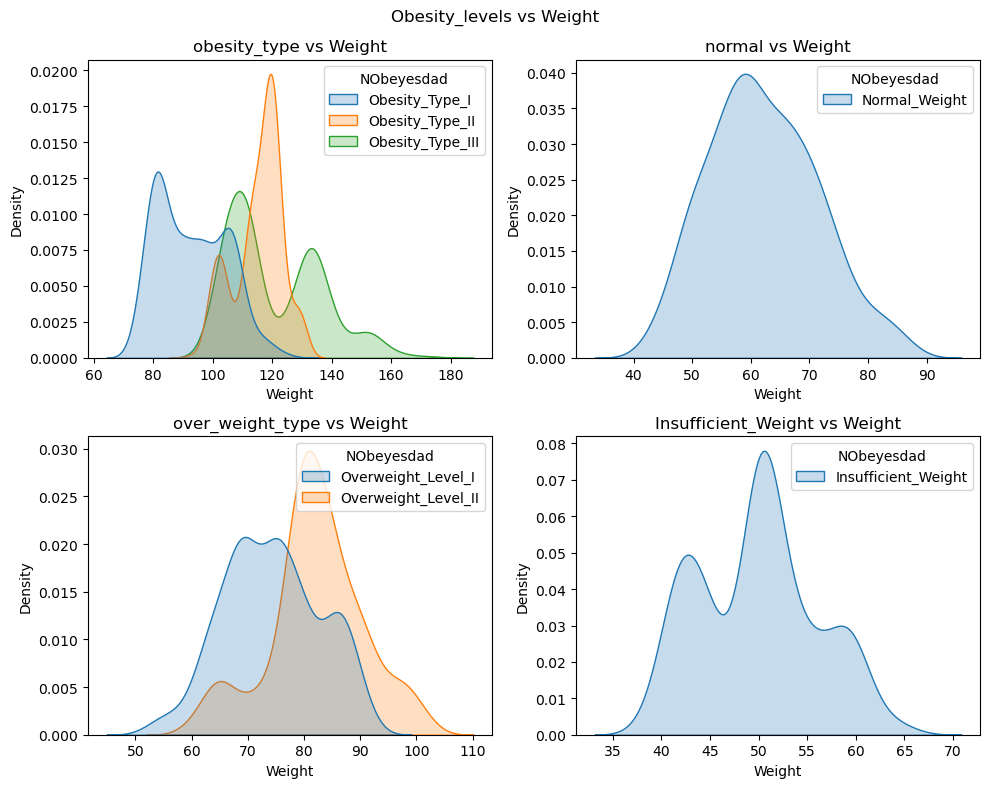

In [333]:
data_list = [df_ot_final, df_ow_final, df_n, df_In]
data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i in range(2):
    
    sns.kdeplot(ax = axes[i,0],data=data_list[i], x="Weight", hue="NObeyesdad", fill =True)
    axes[i, 0].set_title(f'{data_name[i]} vs Weight')
    
    sns.kdeplot(ax = axes[i,1],data=data_list[i+2], x="Weight", hue="NObeyesdad", fill =True)
    axes[i, 1].set_title(f'{data_name[i+2]} vs Weight')
    
    
    
fig.suptitle('Obesity_levels vs Weight')
plt.tight_layout()
plt.show()

# FCVC

C:\Users\AVIDEH\anaconda3\Lib\site-packages\seaborn\distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.



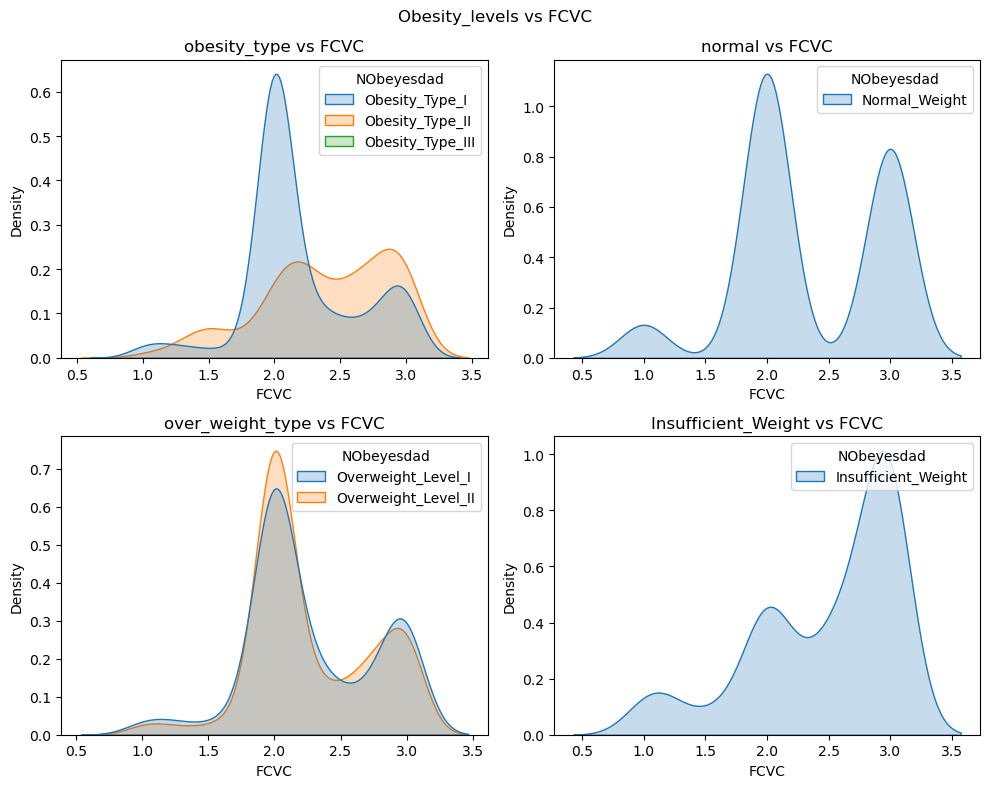

In [334]:
data_list = [df_ot_final, df_ow_final, df_n, df_In]
data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i in range(2):
    
    sns.kdeplot(ax = axes[i,0],data=data_list[i], x="FCVC", hue="NObeyesdad", fill =True)
    axes[i, 0].set_title(f'{data_name[i]} vs FCVC')
    
    sns.kdeplot(ax = axes[i,1],data=data_list[i+2], x="FCVC", hue="NObeyesdad", fill =True)
    axes[i, 1].set_title(f'{data_name[i+2]} vs FCVC')
    
    
    
fig.suptitle('Obesity_levels vs FCVC')
plt.tight_layout()
plt.show()

# NCP

C:\Users\AVIDEH\anaconda3\Lib\site-packages\seaborn\distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.



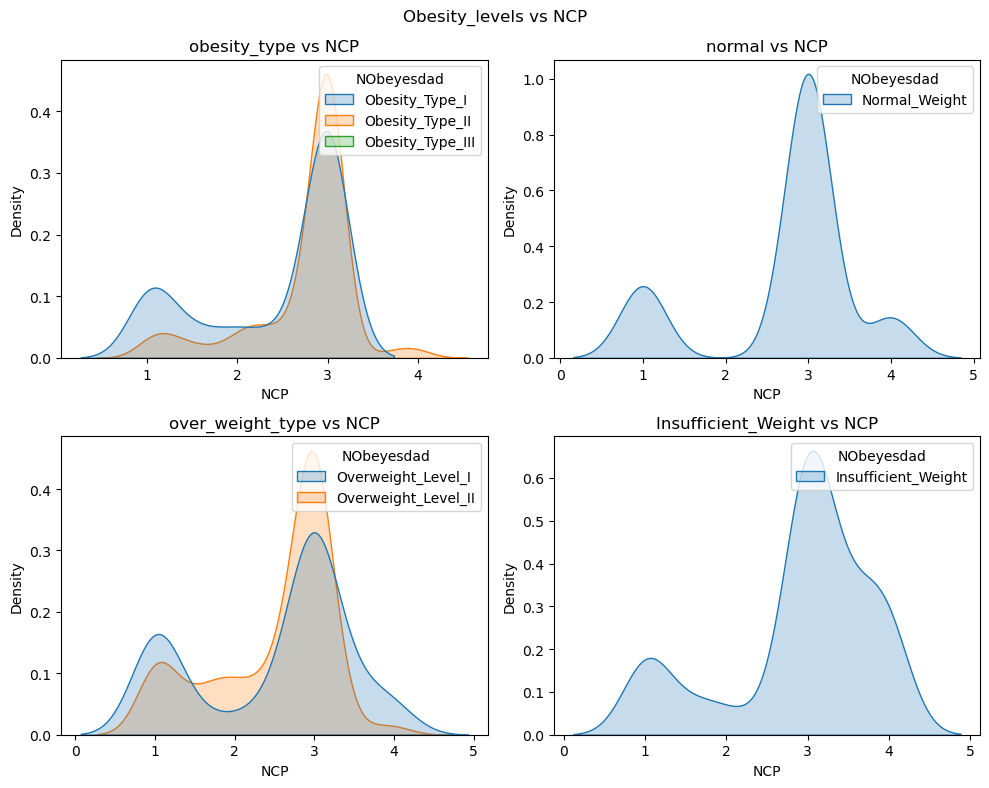

In [335]:
data_list = [df_ot_final, df_ow_final, df_n, df_In]
data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i in range(2):
    
    sns.kdeplot(ax = axes[i,0],data=data_list[i], x="NCP", hue="NObeyesdad", fill =True)
    axes[i, 0].set_title(f'{data_name[i]} vs NCP')
    
    sns.kdeplot(ax = axes[i,1],data=data_list[i+2], x="NCP", hue="NObeyesdad", fill =True)
    axes[i, 1].set_title(f'{data_name[i+2]} vs NCP')
    
    
    
fig.suptitle('Obesity_levels vs NCP')
plt.tight_layout()
plt.show()

# CH2O

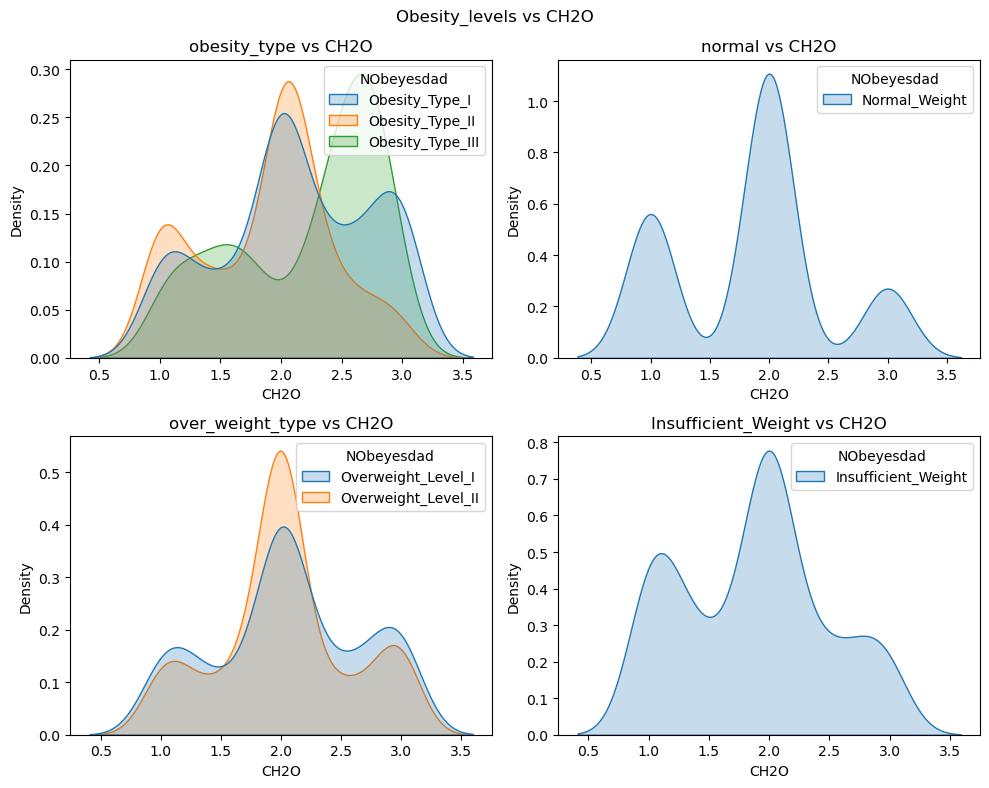

In [336]:
data_list = [df_ot_final, df_ow_final, df_n, df_In]
data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i in range(2):
    
    sns.kdeplot(ax = axes[i,0],data=data_list[i], x="CH2O", hue="NObeyesdad", fill =True)
    axes[i, 0].set_title(f'{data_name[i]} vs CH2O')
    
    sns.kdeplot(ax = axes[i,1],data=data_list[i+2], x="CH2O", hue="NObeyesdad", fill =True)
    axes[i, 1].set_title(f'{data_name[i+2]} vs CH2O')
    
    
    
fig.suptitle('Obesity_levels vs CH2O')
plt.tight_layout()
plt.show()

# FAF

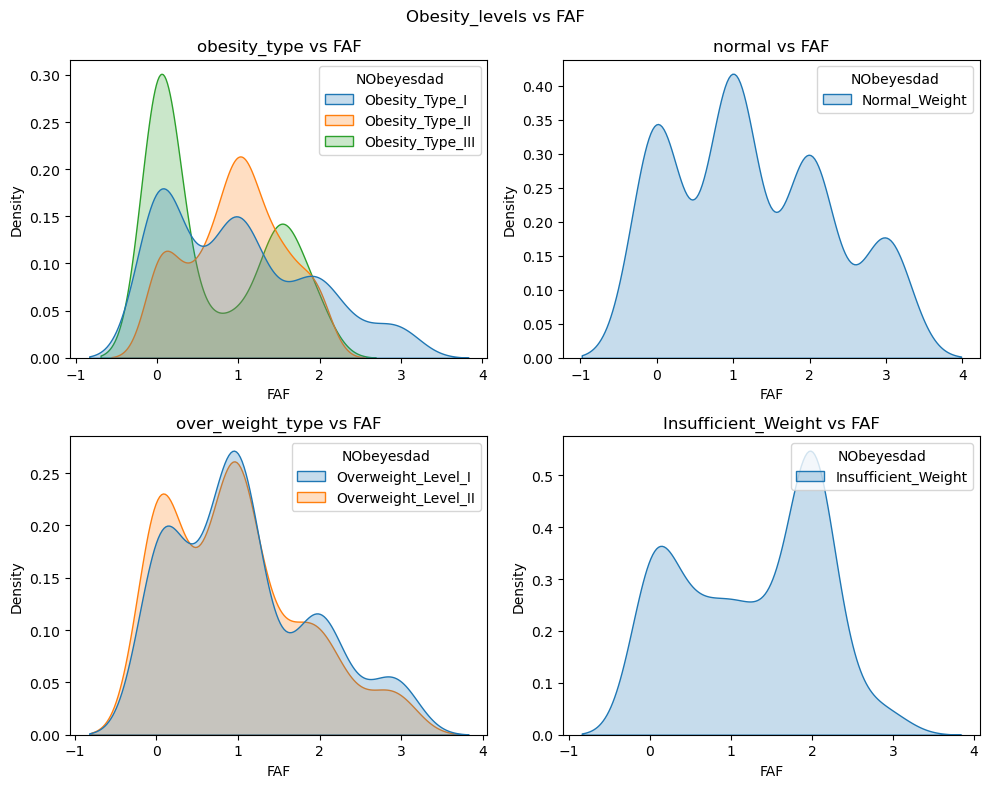

In [337]:
data_list = [df_ot_final, df_ow_final, df_n, df_In]
data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i in range(2):
    
    sns.kdeplot(ax = axes[i,0],data=data_list[i], x="FAF", hue="NObeyesdad", fill =True)
    axes[i, 0].set_title(f'{data_name[i]} vs FAF')
    
    sns.kdeplot(ax = axes[i,1],data=data_list[i+2], x="FAF", hue="NObeyesdad", fill =True)
    axes[i, 1].set_title(f'{data_name[i+2]} vs FAF')
    
    
    
fig.suptitle('Obesity_levels vs FAF')
plt.tight_layout()
plt.show()

# TUE

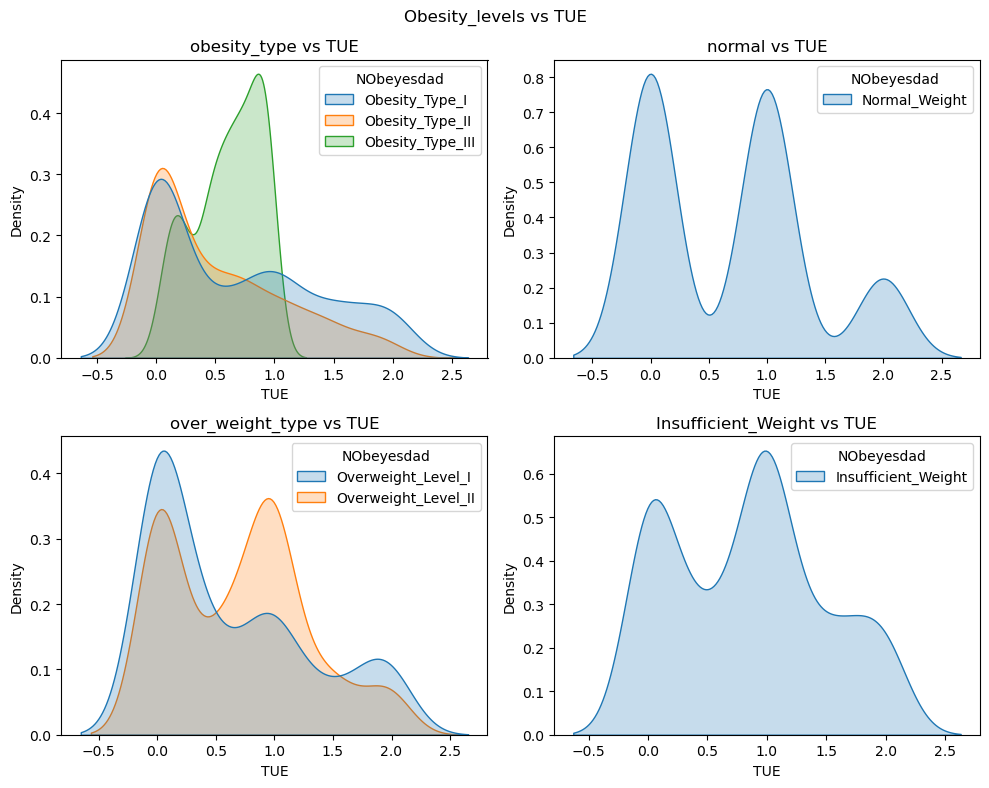

In [338]:
data_list = [df_ot_final, df_ow_final, df_n, df_In]
data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i in range(2):
    
    sns.kdeplot(ax = axes[i,0],data=data_list[i], x="TUE", hue="NObeyesdad", fill =True)
    axes[i, 0].set_title(f'{data_name[i]} vs TUE')
    
    sns.kdeplot(ax = axes[i,1],data=data_list[i+2], x="TUE", hue="NObeyesdad", fill =True)
    axes[i, 1].set_title(f'{data_name[i+2]} vs TUE')
    
    
    
fig.suptitle('Obesity_levels vs TUE')
plt.tight_layout()
plt.show()

In [339]:
######################################## manual feature encoding ####################################################

In [4]:
df1 = df.copy()

In [5]:
df1.loc[df1['NObeyesdad'] == 'Normal_Weight', 'NObeyesdad'] = 2
df1.loc[df1['NObeyesdad'] == 'Overweight_Level_I', 'NObeyesdad'] = 3
df1.loc[df1['NObeyesdad'] == 'Overweight_Level_II', 'NObeyesdad'] = 4
df1.loc[df1['NObeyesdad'] == 'Obesity_Type_I', 'NObeyesdad'] = 5
df1.loc[df1['NObeyesdad'] == 'Insufficient_Weight', 'NObeyesdad'] = 6
df1.loc[df1['NObeyesdad'] == 'Obesity_Type_II', 'NObeyesdad'] = 7
df1.loc[df1['NObeyesdad'] == 'Obesity_Type_III', 'NObeyesdad'] = 8

        ###################### data to number #################

        # Gender

df1.loc[df1['Gender'] == 'Female', 'Gender'] = 2
df1.loc[df1['Gender'] == 'Male', 'Gender'] = 3

        # family_history_with_overweight

df1.loc[df1['family_history_with_overweight'] == 'no', 'family_history_with_overweight'] = 2
df1.loc[df1['family_history_with_overweight'] == 'yes', 'family_history_with_overweight'] = 3

        # FAVC

df1.loc[df1['FAVC'] == 'no', 'FAVC'] = 2
df1.loc[df1['FAVC'] == 'yes', 'FAVC'] = 3

        # CAEC

df1.loc[df1['CAEC'] == 'no', 'CAEC'] = 2
df1.loc[df1['CAEC'] == 'Sometimes', 'CAEC'] = 3
df1.loc[df1['CAEC'] == 'Frequently', 'CAEC'] = 4
df1.loc[df1['CAEC'] == 'Always', 'CAEC'] = 5

        # SMOKE

df1.loc[df1['SMOKE'] == 'no', 'SMOKE'] = 2
df1.loc[df1['SMOKE'] == 'yes', 'SMOKE'] = 3
        
        # SCC

df1.loc[df1['SCC'] == 'no', 'SCC'] = 2
df1.loc[df1['SCC'] == 'yes', 'SCC'] = 3

        # CALC

df1.loc[df1['CALC'] == 'no', 'CALC'] = 2
df1.loc[df1['CALC'] == 'Sometimes', 'CALC'] = 3
df1.loc[df1['CALC'] == 'Frequently', 'CALC'] = 4
df1.loc[df1['CALC'] == 'Always', 'CALC'] = 5

        # MTRANS

df1.loc[df1['MTRANS'] == 'Automobile', 'MTRANS'] = 2
df1.loc[df1['MTRANS'] == 'Motorbike', 'MTRANS'] = 3
df1.loc[df1['MTRANS'] == 'Bike', 'MTRANS'] = 4
df1.loc[df1['MTRANS'] == 'Public_Transportation', 'MTRANS'] = 5
df1.loc[df1['MTRANS'] == 'Walking', 'MTRANS'] = 6

#########################################################

df1 = df1.astype('float64')


# Heat Map

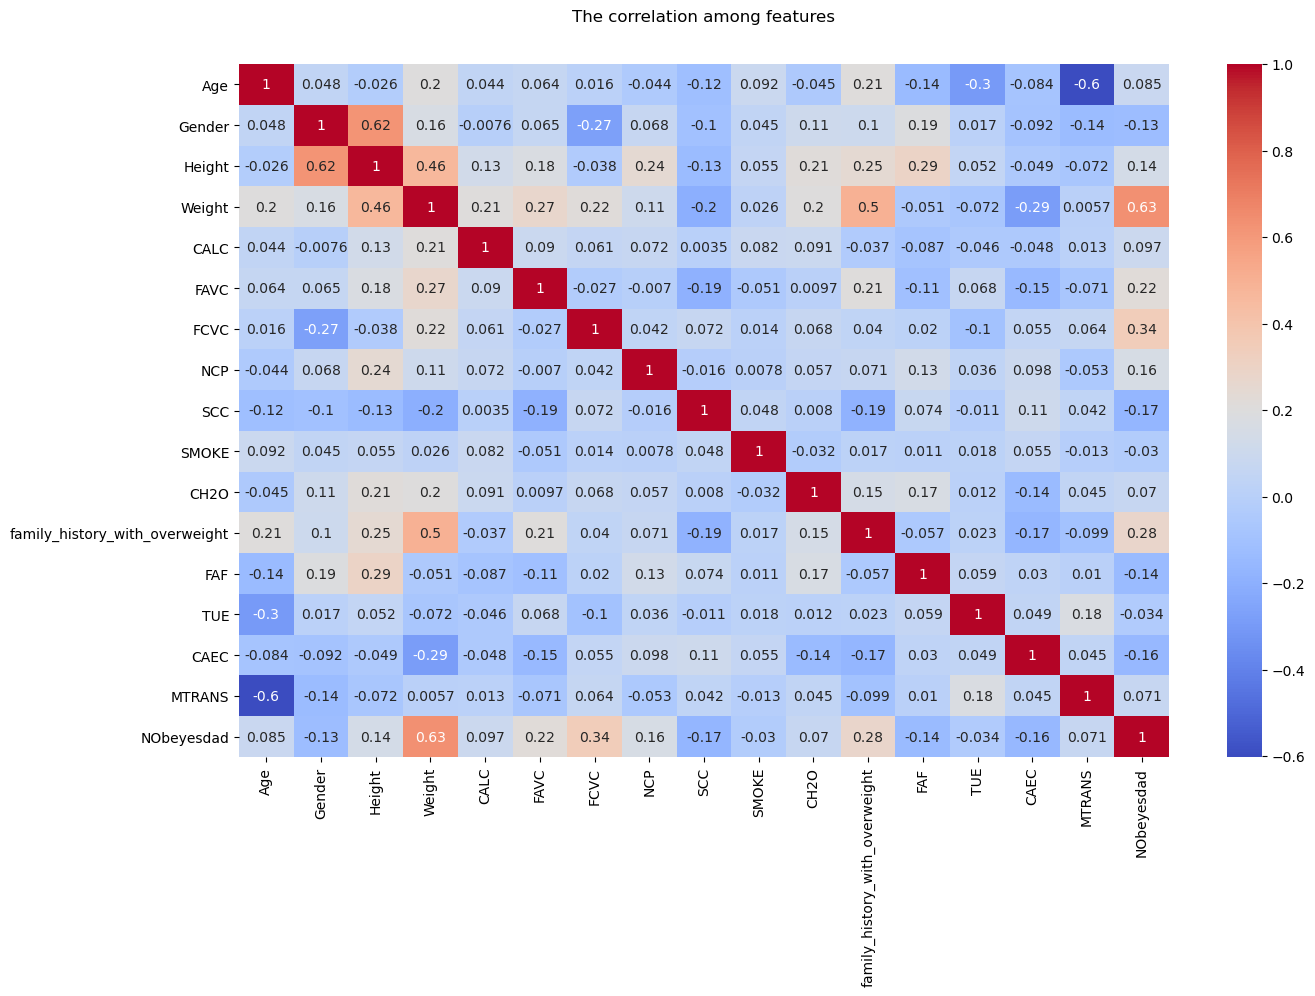

In [343]:
plt.figure(figsize=(15,9))
sns.heatmap(df1.corr(), annot = True, cmap = "coolwarm")
plt.title('The correlation among features',y= 1.05)
plt.show()

According to heat map it can be seen that there is strong correlation between weight and obesity levels

# KDE PLOT 

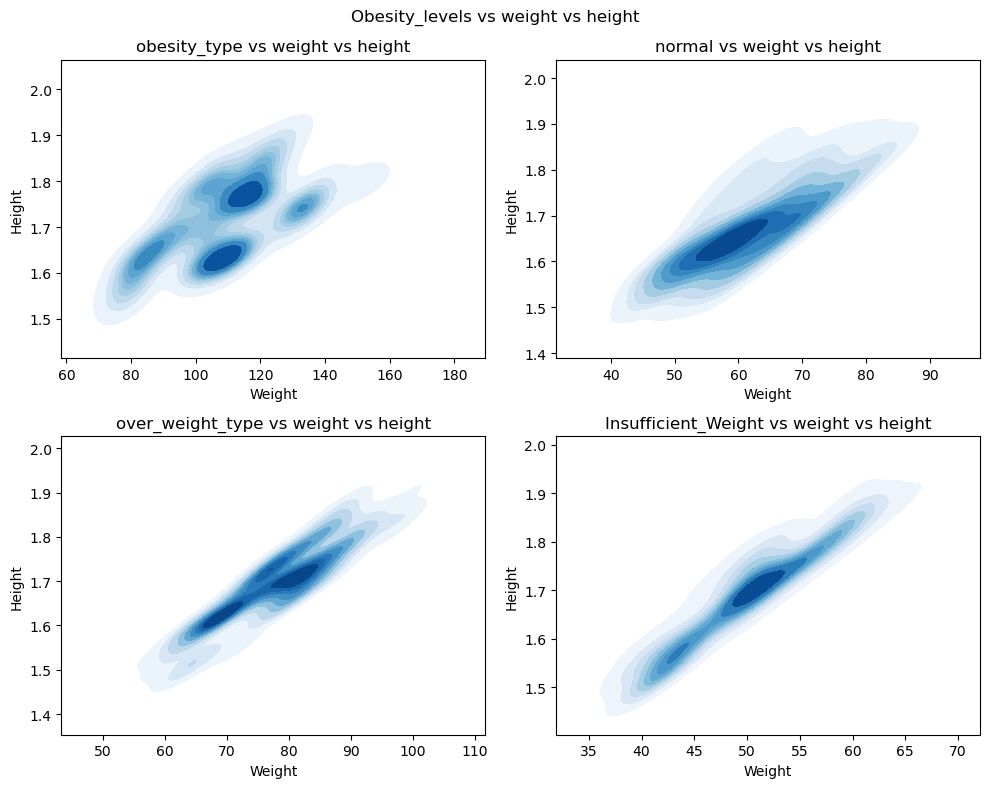

In [344]:
data_list = [df_ot_final, df_ow_final, df_n, df_In]
data_name = ["obesity_type", "over_weight_type", "normal", "Insufficient_Weight"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for i in range(2):
    sns.kdeplot(data=data_list[i], x='Weight', y='Height', ax=axes[i, 0], color='b', shade=True, label='NObeyesdad',
                cmap="Blues", thresh=0.05)
    axes[i, 0].set_title(f'{data_name[i]} vs weight vs height')

    sns.kdeplot(data=data_list[i + 2], x='Weight', y='Height', ax=axes[i, 1], color='b', shade=True, label='NObeyesdad',
                cmap="Blues", thresh=0.05)
    axes[i, 1].set_title(f'{data_name[i + 2]} vs weight vs height')

fig.suptitle('Obesity_levels vs weight vs height')
plt.tight_layout()
plt.show()

In [345]:
################################################ models ####################################################

In [8]:
x = df1.drop(columns=["NObeyesdad"])
y = df1["NObeyesdad"].values.reshape(-1, 1)

# Logistic Regression

In [347]:
def LogReg(x,y, test_size, solver_list):
    
    df_evaluation= pd.DataFrame()
    
    ########################### normalizing data  ------------->  StandardScaler ###################################
        
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = test_size, random_state = 0)
        
    scaler = StandardScaler()

    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled= scaler.transform(x_test)
    
    ########################## logistic model ####################################
        
    c_list = [0.1, 0.2, 0.4, 0.5, 1,2,4,5,10,20,50,100,400]
        

    for c in c_list:
            
        for s in solver_list:
                
            logreg = LogisticRegression(solver = s, penalty= 'l2' ,C = c , class_weight = 'balanced')
            
            logreg.fit(x_train_scaled, y_train.ravel())
            y_pred = logreg.predict(x_test_scaled)
            
            #####################
            
            x_norm = scaler.transform(x)
            
            dict = { 'Test_size': test_size, "acc": metrics.accuracy_score(y_test, y_pred), "c" : c,"solver":s ,"score": logreg.score(x_norm,y)}
                
            df_entry = pd.DataFrame([dict])  # Convert dictionary to DataFrame
            df_evaluation = pd.concat([df_evaluation, df_entry], ignore_index=True)  # Concatenate DataFrames
            
            
            
    return (x_train, x_test, y_train, y_test, y_pred, df_evaluation)
    

In [348]:

x_train, x_test, y_train, y_test, y_pred, df_evaluation = LogReg(x,y,.25,['newton-cg', 'sag', 'saga', 'lbfgs'])


C:\Users\AVIDEH\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\AVIDEH\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\AVIDEH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\AVIDEH\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\AVIDEH\anaconda3\Li

In [11]:
def highlight_max(s):
    
    is_max = s == s.max()
    return['background-color: blue' if v else '' for v in is_max]

In [350]:
df_evaluation.style.apply(highlight_max)

# Best Logistic Model 

In [410]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [411]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)


In [412]:
best_logreg_model = LogisticRegression(solver = 'newton-cg', penalty= 'l2' ,C = 400 , class_weight = 'balanced')
best_logreg_model.fit(x_train_scaled, y_train.ravel())

LogisticRegression(C=400, class_weight='balanced', solver='newton-cg')

In [413]:
x_norm = scaler.transform(x)

In [415]:
confusion_matrix(y, best_logreg_model.predict(x_norm) )

array([[277,   2,   0,   0,   8,   0,   0],
       [  4, 276,  10,   0,   0,   0,   0],
       [  0,  13, 276,   1,   0,   0,   0],
       [  0,   0,   1, 350,   0,   0,   0],
       [  1,   0,   0,   0, 271,   0,   0],
       [  0,   0,   0,   0,   0, 297,   0],
       [  0,   0,   0,   0,   0,   0, 324]], dtype=int64)

In [477]:
print(classification_report(y, best_logreg_model.predict(x_norm)))

              precision    recall  f1-score   support

         2.0       0.97      0.97      0.97       287
         3.0       0.95      0.95      0.95       290
         4.0       0.96      0.96      0.96       290
         5.0       0.99      1.00      0.99       351
         6.0       0.99      0.98      0.98       272
         7.0       1.00      1.00      1.00       297
         8.0       1.00      1.00      1.00       324

    accuracy                           0.98      2111
   macro avg       0.98      0.98      0.98      2111
weighted avg       0.98      0.98      0.98      2111



# knn

In [352]:
metric_list = ['cityblock','euclidean', 'l1', 'l2', 'manhattan','nan_euclidean']
p_list =[1, 2]

n_neighbors_list = range(1,30)

In [404]:
def KNN (x, y, test_size, p):
    
    training_acc =[]
    test_acc =[]

    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = 0)
    
    df_evaluation= pd.DataFrame()
    
    ########################### normalizing data  ------------->  StandardScaler ###################################
        
    scaler = StandardScaler()

    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled= scaler.transform(x_test)
    
    ########################### knn model ###################################
    
    for k in n_neighbors_list:
        
        
        for metric in metric_list:
            
            knn_model = KNeighborsClassifier(k, p = p, metric = metric, n_jobs = -1)
            knn_model.fit(x_train_scaled, y_train.ravel())
            y_pred = knn_model.predict(x_test_scaled)
            
            training_acc.append(knn_model.score(x_train_scaled, y_train))     
            test_acc.append(knn_model.score(x_test_scaled ,y_test))
            
            x_norm = scaler.transform(x)
            
            dict = { 'Test_size': test_size, "acc": metrics.accuracy_score(y_test, y_pred),"metric":metric ,"p" : p,"n_neighbor":k ,"score": knn_model.score(x_norm,y)}
                
            df_entry = pd.DataFrame([dict])  # Convert dictionary to DataFrame
            df_evaluation = pd.concat([df_evaluation, df_entry], ignore_index=True)  # Concatenate DataFrames
            
            
            
    return (x_train, x_test, y_train, y_test,training_acc, test_acc ,y_pred, df_evaluation)
            
    

In [405]:
x_train, x_test, y_train, y_test,training_acc, test_acc ,y_pred, df_evaluation = KNN(x,y,0.1, 1)

In [406]:
df_evaluation.style.apply(highlight_max)

# Best KNN Model

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 0)

In [15]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [418]:
best_knn_model = KNeighborsClassifier(1, p = 1, metric ='cityblock', n_jobs = -1)
best_knn_model.fit(x_train_scaled, y_train.ravel())

KNeighborsClassifier(metric='cityblock', n_jobs=-1, n_neighbors=1, p=1)

In [423]:
knn_acc= best_knn_model.score(x_norm,y)
knn_acc

0.9895783988630981

In [424]:
x_norm = scaler.transform(x)

In [425]:
confusion_matrix(y, best_knn_model.predict(x_norm) )

array([[281,   2,   1,   2,   1,   0,   0],
       [  3, 284,   1,   2,   0,   0,   0],
       [  0,   2, 286,   2,   0,   0,   0],
       [  2,   0,   0, 349,   0,   0,   0],
       [  2,   0,   2,   0, 268,   0,   0],
       [  0,   0,   0,   0,   0, 297,   0],
       [  0,   0,   0,   0,   0,   0, 324]], dtype=int64)

In [478]:
print(classification_report(y, best_knn_model.predict(x_norm)))

              precision    recall  f1-score   support

         2.0       0.98      0.98      0.98       287
         3.0       0.99      0.98      0.98       290
         4.0       0.99      0.99      0.99       290
         5.0       0.98      0.99      0.99       351
         6.0       1.00      0.99      0.99       272
         7.0       1.00      1.00      1.00       297
         8.0       1.00      1.00      1.00       324

    accuracy                           0.99      2111
   macro avg       0.99      0.99      0.99      2111
weighted avg       0.99      0.99      0.99      2111



# Decision Tree

In [6]:
def Decision_Tree(x,y, test_size, max_depth_list):
    
    training_acc, test_acc = [] , []
    
    criterion_list = ['entropy', 'gini']
    
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = 0)
    
    df_evaluation= pd.DataFrame()
    
    ########################### normalizing data  ------------->  StandardScaler ###################################
        
    scaler = StandardScaler()

    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled= scaler.transform(x_test)
    
    ########################### Decision_Tree model ###################################

    for criterion in (criterion_list):
    
    
        for m in max_depth_list:
        
            tree_model = DecisionTreeClassifier( criterion= criterion, max_depth = m, random_state = 0)
        
            tree_model.fit(x_train_scaled, y_train.ravel())
            y_pred = tree_model.predict(x_test_scaled)
            
            
            training_acc.append(tree_model.score(x_train_scaled, y_train))     
            test_acc.append(tree_model.score(x_test_scaled ,y_test))
            
            x_norm = scaler.transform(x)
            
            dict = { 'Test_size': test_size, "acc": metrics.accuracy_score(y_test, y_pred) ,"criterion": criterion,"max_depth": m,"score": tree_model.score(x_norm,y)}
                
            df_entry = pd.DataFrame([dict])  # Convert dictionary to DataFrame
            df_evaluation = pd.concat([df_evaluation, df_entry], ignore_index=True)  # Concatenate DataFrames
            
            
            
    return (x_train, x_test, y_train, y_test,training_acc, test_acc ,y_pred, df_evaluation)
        

In [9]:
x_train, x_test, y_train, y_test,training_acc, test_acc ,y_pred, df_evaluation = Decision_Tree (x,y, 0.1,range(2,16) )

In [12]:
df_evaluation.style.apply(highlight_max)

# Best Decision Tree Model

In [16]:
best_DT_model = DecisionTreeClassifier( criterion= 'entropy', max_depth = 9, random_state = 0)
best_DT_model.fit(x_train_scaled, y_train.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0)

In [17]:
x_norm = scaler.transform(x)

In [18]:
DT_acc= best_DT_model.score(x_norm,y)
DT_acc

0.9933680720037896

In [19]:
confusion_matrix(y, best_DT_model.predict(x_norm) )

array([[283,   3,   0,   0,   1,   0,   0],
       [  1, 289,   0,   0,   0,   0,   0],
       [  0,   5, 284,   1,   0,   0,   0],
       [  0,   0,   0, 351,   0,   0,   0],
       [  1,   0,   0,   0, 271,   0,   0],
       [  0,   0,   0,   2,   0, 295,   0],
       [  0,   0,   0,   0,   0,   0, 324]], dtype=int64)

In [20]:
print(classification_report(y, best_DT_model.predict(x_norm)))

              precision    recall  f1-score   support

         2.0       0.99      0.99      0.99       287
         3.0       0.97      1.00      0.98       290
         4.0       1.00      0.98      0.99       290
         5.0       0.99      1.00      1.00       351
         6.0       1.00      1.00      1.00       272
         7.0       1.00      0.99      1.00       297
         8.0       1.00      1.00      1.00       324

    accuracy                           0.99      2111
   macro avg       0.99      0.99      0.99      2111
weighted avg       0.99      0.99      0.99      2111



# Random Forest

In [407]:
def Random_Forest(x,y, test_size, max_depth_list):
    
    training_acc, test_acc = [] , []
    
    criterion_list = ['entropy', 'gini']
    
    estimator_list = range(10, 101)
    
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = 0)
    
    df_evaluation= pd.DataFrame()
    
    ########################### normalizing data  ------------->  StandardScaler ###################################
        
    scaler = StandardScaler()

    x_train_scaled = scaler.fit_transform(x_train)         
    x_test_scaled= scaler.transform(x_test)                
    
    ########################### Rf model ###################################

    for s in estimator_list:
        
        for m in max_depth_list:
            
            for criterion in (criterion_list):
                
                Rf_model = RandomForestClassifier(n_estimators= s, max_depth= m, criterion= criterion, random_state=0)
                Rf_model.fit(x_train_scaled, y_train.ravel())
                y_pred = Rf_model.predict(x_test_scaled)
            
            
                training_acc.append(Rf_model.score(x_train_scaled, y_train))     
                test_acc.append(Rf_model.score(x_test_scaled ,y_test))
            
                x_norm = scaler.transform(x)
            
                dict = {'Test_size': test_size, "acc": metrics.accuracy_score(y_test, y_pred),
                          "n_estimator": s, "criterion": criterion, "max_depth": m,
                          "score": Rf_model.score(x_norm, y)}
                
                df_entry = pd.DataFrame([dict])  # Convert dictionary to DataFrame
                df_evaluation = pd.concat([df_evaluation, df_entry], ignore_index=True)  # Concatenate DataFrames
            
            
            
    return (x_train, x_test, y_train, y_test,training_acc, test_acc ,y_pred, df_evaluation)

In [408]:
x_train, x_test, y_train, y_test,training_acc, test_acc ,y_pred, df_evaluation = Random_Forest (x,y, 0.1,range (2, 16))

In [409]:
df_evaluation.style.apply(highlight_max)

# Best Random Forest Model

In [445]:
best_RF_model = RandomForestClassifier(n_estimators= 46, max_depth= 15, criterion= 'entropy', random_state=0)
best_RF_model.fit(x_train_scaled, y_train.ravel())

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=46,
                       random_state=0)

In [446]:
x_norm = scaler.transform(x)

In [447]:
RF_acc= best_RF_model.score(x_norm,y)
RF_acc

0.9971577451444813

In [448]:
confusion_matrix(y, best_RF_model.predict(x_norm) )

array([[287,   0,   0,   0,   0,   0,   0],
       [  2, 287,   1,   0,   0,   0,   0],
       [  0,   0, 290,   0,   0,   0,   0],
       [  0,   0,   0, 351,   0,   0,   0],
       [  3,   0,   0,   0, 269,   0,   0],
       [  0,   0,   0,   0,   0, 297,   0],
       [  0,   0,   0,   0,   0,   0, 324]], dtype=int64)

In [480]:
print(classification_report(y, best_RF_model.predict(x_norm)))

              precision    recall  f1-score   support

         2.0       0.99      0.89      0.94       287
         3.0       0.90      0.96      0.93       290
         4.0       0.95      0.94      0.94       290
         5.0       0.99      0.98      0.99       351
         6.0       0.93      1.00      0.96       272
         7.0       0.99      0.99      0.99       297
         8.0       1.00      1.00      1.00       324

    accuracy                           0.97      2111
   macro avg       0.97      0.96      0.96      2111
weighted avg       0.97      0.97      0.97      2111



# SVM

In [390]:
def svm_model(x,y,test_size):
    
    training_acc, test_acc = [] , []
    kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
    penalty_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    
    
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = test_size, random_state = 0)
    
    df_evaluation1= pd.DataFrame()
    
    ########################### normalizing data  ------------->  StandardScaler ###################################
        
    scaler = StandardScaler()

    x_train_scaled = scaler.fit_transform(x_train)         
    x_test_scaled= scaler.transform(x_test)                
    
    ########################### SVM model ###################################
    
    
    for kernel in kernel_list:
        
        for c in penalty_list:
        
            svm_model = SVC(kernel = kernel, C=c)
            svm_model.fit(x_train_scaled, y_train.ravel())
        
            y_pred = svm_model.predict(x_test_scaled)
            
            
            training_acc.append(svm_model.score(x_train_scaled, y_train))     
            test_acc.append(svm_model.score(x_test_scaled ,y_test))
            
            x_norm = scaler.transform(x)
            
            dict = {'Test_size': test_size, "acc": metrics.accuracy_score(y_test, y_pred),
                           "penalty": c, "kernel": kernel,"score": svm_model.score(x_norm, y)}
                
            df_entry = pd.DataFrame([dict])  # Convert dictionary to DataFrame
            df_evaluation1 = pd.concat([df_evaluation1, df_entry], ignore_index=True)  # Concatenate DataFrames
            
            
            
    return (x_train, x_test, y_train, y_test,training_acc, test_acc ,y_pred, df_evaluation1)
    


In [401]:
x_train, x_test, y_train, y_test, training_acc, test_acc , y_pred, df_evaluation1 = svm_model (x,y, 0.1)

In [402]:
df_evaluation1.style.apply(highlight_max)

# Best SVM model

In [450]:
best_svm_model = SVC(kernel = 'linear', C=1)
best_svm_model.fit(x_train_scaled, y_train.ravel())

SVC(C=1, kernel='linear')

In [451]:
RF_acc= best_svm_model.score(x_norm,y)
RF_acc

0.9658929417337755

In [452]:
confusion_matrix(y, best_svm_model.predict(x_norm) )

array([[255,  13,   0,   0,  19,   0,   0],
       [  2, 278,  10,   0,   0,   0,   0],
       [  0,  17, 272,   1,   0,   0,   0],
       [  0,   0,   4, 344,   0,   3,   0],
       [  1,   0,   0,   0, 271,   0,   0],
       [  0,   0,   0,   2,   0, 295,   0],
       [  0,   0,   0,   0,   0,   0, 324]], dtype=int64)

In [481]:
print(classification_report(y, best_svm_model.predict(x_norm)))

              precision    recall  f1-score   support

         2.0       0.99      0.89      0.94       287
         3.0       0.90      0.96      0.93       290
         4.0       0.95      0.94      0.94       290
         5.0       0.99      0.98      0.99       351
         6.0       0.93      1.00      0.96       272
         7.0       0.99      0.99      0.99       297
         8.0       1.00      1.00      1.00       324

    accuracy                           0.97      2111
   macro avg       0.97      0.96      0.96      2111
weighted avg       0.97      0.97      0.97      2111



# Confusion Matrix

In [475]:
best_model_list = [best_DT_model, best_RF_model]
model_name_list = ["Decision_Tree", "Random_Forest"]

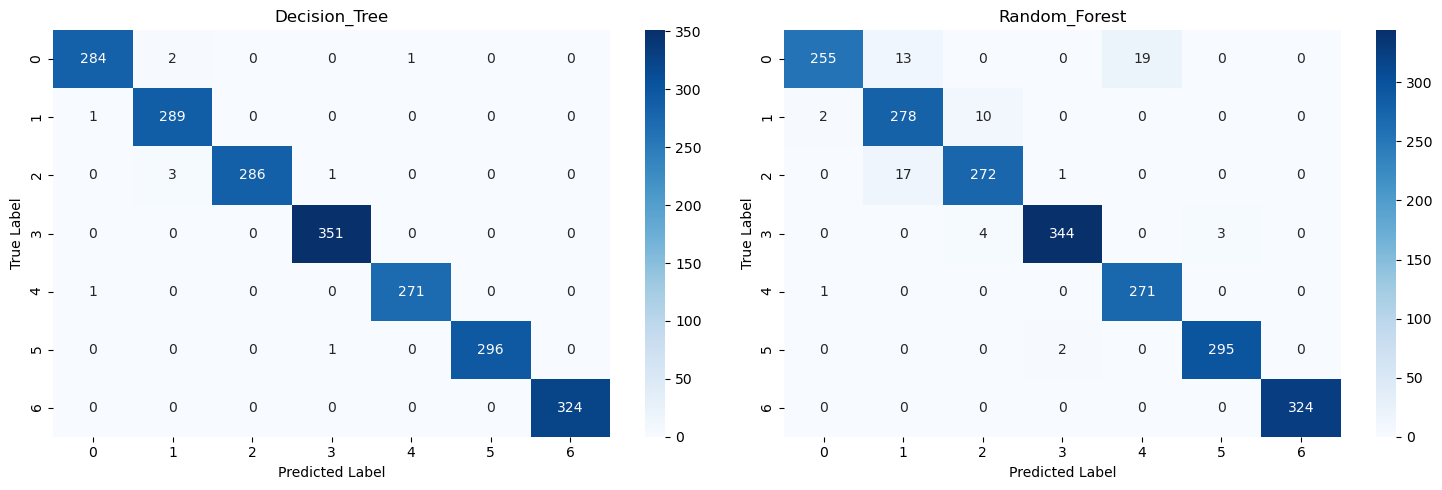

In [476]:
fig, axs = plt.subplots(figsize=(15,5),nrows = 1, ncols = 2)

for i in range(len(best_model_list)):
    
    x_norm = scaler.transform(x)
    
    cm = confusion_matrix(y, best_model_list[i].predict(x_norm))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[i])
    
    
    axs[i].set_title(f'{model_name_list[i]}')
    axs[i].set_xlabel('Predicted Label')
    axs[i].set_ylabel('True Label')
    
plt.tight_layout()
plt.show()